In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import seaborn as sns

In [2]:
credit_default_data = pd.read_csv("Credit Card Default Data.csv")
credit_default_data

,default,student,income,balance
0,Yes,Yes,9663.79,2024.66
1,Yes,Yes,10155.32,1681.48
2,Yes,Yes,10470.64,2066.70
3,Yes,Yes,10591.72,1707.91
4,Yes,Yes,11054.07,1492.96
...,...,...,...,...
9496,No,No,70700.65,1067.84
9497,No,No,71238.55,1253.18
9498,No,No,71878.77,201.81
9499,No,No,72461.30,1233.71


### Create simple logistic regression model with balance as predictor

In [3]:
y1 = credit_default_data['default'].copy()
X1 = credit_default_data[['balance']].copy()  # sklearn expects x to be a dataframe.  
y1

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
9496     No
9497     No
9498     No
9499     No
9500     No
Name: default, Length: 9501, dtype: object

In [4]:
model1 = LogisticRegression().fit(X1,y1)

In [5]:
model1.intercept_

array([-10.64979227])

In [6]:
model1.coef_

array([[0.005498]])

In [7]:
model1.score(X1,y1)

0.9710556783496475

Calculate estimated probability of default for someone with a balance of 1000 and 2000

In [8]:
balance = 1000
np.exp(model1.intercept_ + model1.coef_*balance)/(1+np.exp(model1.intercept_ + model1.coef_*balance))

array([[0.00575567]])

In [9]:
balance = 2000
np.exp(model1.intercept_ + model1.coef_*balance)/(1+np.exp(model1.intercept_ + model1.coef_*balance))

array([[0.58569553]])

### Create simple logistic regression model with student as predictor

In [10]:
y2 = credit_default_data['default'].copy()
dummy_vars = pd.get_dummies(credit_default_data['student'])
X2 = dummy_vars[['Yes']].copy()

In [11]:
model2 = LogisticRegression().fit(X2,y2)

In [12]:
model2.intercept_

array([-3.43705617])

In [13]:
model2.coef_

array([[0.35856645]])

Calculate estimated probability of default for students and non-students:

In [14]:
student = 1
prob_student = np.exp(model2.intercept_ + model2.coef_*student)/(1+np.exp(model2.intercept_ + 
                                                                          model2.coef_*student))
prob_student

array([[0.0440033]])

In [15]:
student = 0
prob_non_student = np.exp(model2.intercept_ + model2.coef_*student)/(1+np.exp(model2.intercept_ + 
                                                                              model2.coef_*student))

Interpreting the odds ratio for the student status

In [16]:
np.exp(model2.coef_)

array([[1.43127613]])

In [17]:
prob_student/prob_non_student

array([[1.41229856]])

## Create and Assess multiple logistic model

In [18]:
y3 = credit_default_data['default'].copy()
X3 = credit_default_data.drop('default', 1).copy()

In [19]:
dummy_vars = pd.get_dummies(credit_default_data['student'])
X3['student'] = dummy_vars['Yes']
X3

,student,income,balance
0,1,9663.79,2024.66
1,1,10155.32,1681.48
2,1,10470.64,2066.70
3,1,10591.72,1707.91
4,1,11054.07,1492.96
...,...,...,...
9496,0,70700.65,1067.84
9497,0,71238.55,1253.18
9498,0,71878.77,201.81
9499,0,72461.30,1233.71


### Split dataset into training and test

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X3,y3, test_size = 0.25, random_state = 1)
model3 = LogisticRegression().fit(X_train,y_train)

In [52]:
model3.intercept_

array([-2.95293691])

In [54]:
pd.DataFrame(model3.coef_.T, columns = ['Coefficients'], index = X.columns)

,Coefficients
income,-3.911981
balance,-0.000135
student_Yes,0.004101


#### Generate Confustion Matrix

In [149]:
y_hat = model3.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_hat)
cnf_matrix

array([[2270,   20],
       [  73,   13]], dtype=int64)

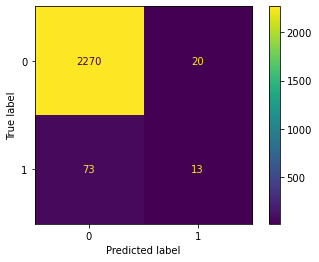

In [150]:
metrics.ConfusionMatrixDisplay(cnf_matrix).plot()

In [151]:
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('True Positives:', TP)

True Negatives: 2270
False Positives: 20
False Negatives: 73
True Positives: 13


In [153]:
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN + FP)
print('Sensitivity:', Sensitivity)
print('Specificity:', Specificity)

Sensitivity: 0.1511627906976744
Specificity: 0.9912663755458515


#### Adjusting the classification threshold

In [132]:
y_probs = model3.predict_proba(X_test)[:,1]
y_probs

array([0.05459464, 0.00301417, 0.00049685, ..., 0.05420965, 0.00601634,
       0.00354868])

<AxesSubplot:ylabel='Count'>

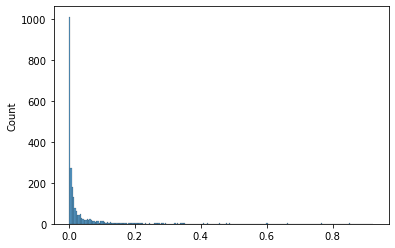

In [133]:
sns.histplot(y_probs)

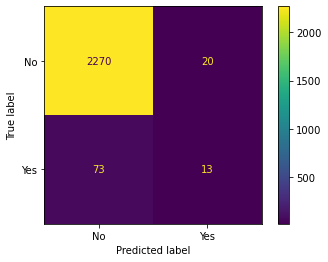

In [142]:
threshold = 0.5
preds = np.where(y_probs > threshold, 'Yes', 'No')
cnf_matrix = metrics.confusion_matrix(y_test, preds)
metrics.ConfusionMatrixDisplay(cnf_matrix, display_labels = ["No", "Yes"]).plot()

In [154]:
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN + FP)
print('Sensitivity:', Sensitivity)
print('Specificity:', Specificity)

Sensitivity: 0.1511627906976744
Specificity: 0.9912663755458515


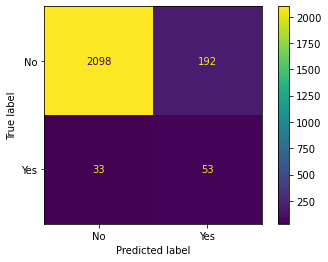

In [156]:
threshold = 0.1
preds = np.where(y_probs > threshold, 'Yes', 'No')
cnf_matrix = metrics.confusion_matrix(y_test, preds)
metrics.ConfusionMatrixDisplay(cnf_matrix, display_labels = ["No", "Yes"]).plot()

In [157]:
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP = cnf_matrix[1,1]
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN + FP)
print('Sensitivity:', Sensitivity)
print('Specificity:', Specificity)

Sensitivity: 0.6162790697674418
Specificity: 0.9161572052401746


#### ROC Chart

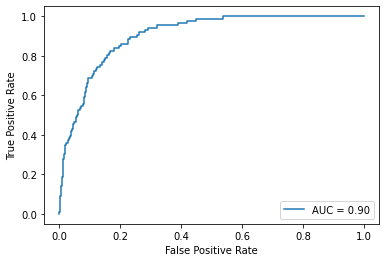

In [178]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs, pos_label = 'Yes')
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [104]:
classification_report = metrics.classification_report(y_test, y_hat)
print(classification_report)

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      2290
         Yes       0.39      0.15      0.22        86

    accuracy                           0.96      2376
   macro avg       0.68      0.57      0.60      2376
weighted avg       0.95      0.96      0.95      2376

